In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from tabulate import tabulate

In [86]:
df = pd.read_excel("../data/Data_MNL_v1.xlsx")
df.head()

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_stasiun,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration
0,3,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 11:50:00,2023-05-01 12:15:00,19200.0,150.0,Tunai,9.55,...,0,0,1,0,13,386,123,17425,2325,1331.814570
1,4,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-01 11:35:00,2023-05-01 11:48:00,7200.0,150.0,Tunai,0.37,...,0,0,1,0,29,184,133,22585,2569,1454.529801
2,5,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:51:00,2023-05-01 11:16:00,15600.0,150.0,Tunai,7.62,...,0,0,8,0,28,143,224,9676,1516,1422.701987
3,6,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:14:00,2023-05-01 10:39:00,16000.0,150.0,Dompet,7.80,...,0,0,9,0,95,262,218,23375,4699,1993.006623
4,7,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 09:05:00,2023-05-01 09:17:00,8000.0,150.0,Dompet,3.90,...,0,0,1,0,13,386,123,17425,2325,1331.814570


In [87]:
# Count null values in each column
null_counts = df.isnull().sum()
print(null_counts)

trip_id                           0
driver_id                      5005
driver_email                   1560
trip_jenis_pesanan                1
trip_datetime_tugas               0
trip_datetime_selesai             0
trip_pendapatan_bersih           31
trip_poin_tambahan               19
trip_jenis_pembayaran             1
trip_jarak                        0
trip_kode                         0
trip_pickup                       0
beh_peta_potensi                  0
sosdem_usia                       0
sosdem_jk                         0
sosdem_status_nikah               0
sosdem_alamat_kelurahan           0
sosdem_alamat_desa                0
sosdem_alamat_kabkota             0
sosdem_pendidikan_terakhir        0
sosdem_jumlah_motor               0
sosdem_jumlah_mobil              50
sosdem_anggota_rt                 0
sosdem_posisi_rt                  0
sosdem_penghasilan_pribadi        0
sosdem_penghasilan_keluarga       0
sosdem_pekerjaan_selain           0
beh_platform                

In [88]:
# Menampilkan baris dengan kedua kolom null
null_both_columns = df[(df['driver_id'].isnull()) & (df['driver_email'].isnull())]
null_both_columns

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_stasiun,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration


## Data Transformation

#### Add data lama pesanan

In [89]:
# Menghitung lamanya waktu pesanan
df['trip_lamanya_waktu_pesanan'] = df['trip_datetime_selesai'] - df['trip_datetime_tugas']

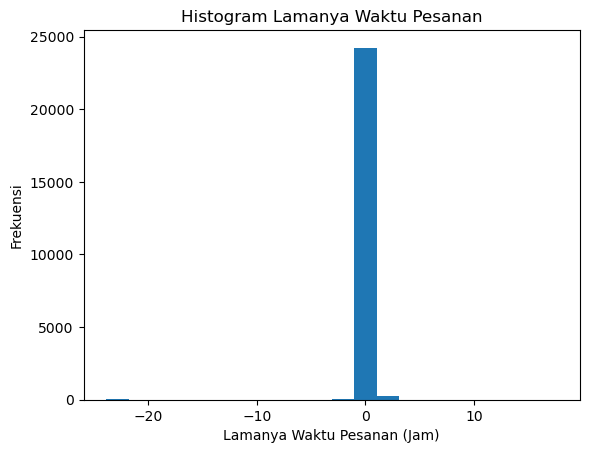

In [90]:
# Membuat histogram
plt.hist(df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600, bins=20)  # Mengonversi ke jam
plt.xlabel('Lamanya Waktu Pesanan (Jam)')
plt.ylabel('Frekuensi')
plt.title('Histogram Lamanya Waktu Pesanan')
plt.show()

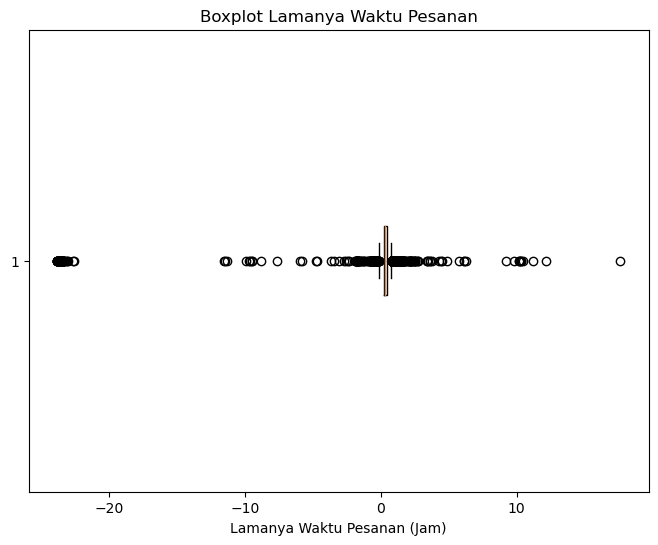

In [91]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600, vert=False)  # Mengonversi ke jam
plt.xlabel('Lamanya Waktu Pesanan (Jam)')
plt.title('Boxplot Lamanya Waktu Pesanan')
plt.show()

In [92]:
df

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
0,3,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 11:50:00,2023-05-01 12:15:00,19200.0,150.0,Tunai,9.55,...,0,1,0,13,386,123,17425,2325,1331.814570,0 days 00:25:00
1,4,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-01 11:35:00,2023-05-01 11:48:00,7200.0,150.0,Tunai,0.37,...,0,1,0,29,184,133,22585,2569,1454.529801,0 days 00:13:00
2,5,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:51:00,2023-05-01 11:16:00,15600.0,150.0,Tunai,7.62,...,0,8,0,28,143,224,9676,1516,1422.701987,0 days 00:25:00
3,6,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:14:00,2023-05-01 10:39:00,16000.0,150.0,Dompet,7.80,...,0,9,0,95,262,218,23375,4699,1993.006623,0 days 00:25:00
4,7,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 09:05:00,2023-05-01 09:17:00,8000.0,150.0,Dompet,3.90,...,0,1,0,13,386,123,17425,2325,1331.814570,0 days 00:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,28889,NaN,ikialink8@gmail.com,Kurir Barang,2023-05-08 19:39:00,2023-05-08 19:56:00,16400.0,150.0,Dompet,5.92,...,0,6,0,32,245,225,13023,2232,1357.251656,0 days 00:17:00
24572,28890,NaN,ikialink8@gmail.com,Food,2023-05-08 19:13:00,2023-05-08 19:29:00,13600.0,150.0,Dompet,2.77,...,0,14,0,68,262,400,20196,2186,2028.569536,0 days 00:16:00
24573,28896,NaN,ikialink8@gmail.com,Ride,2023-05-08 08:53:00,2023-05-08 09:05:00,8000.0,150.0,Dompet,3.21,...,0,14,0,44,147,191,10254,1419,1157.443709,0 days 00:12:00
24574,28897,NaN,ikialink8@gmail.com,Ride,2023-05-08 07:49:00,2023-05-08 08:27:00,24800.0,150.0,Dompet,12.36,...,1,6,0,16,128,128,7522,1328,1193.483444,0 days 00:38:00


In [93]:
# Identifikasi dan tampilkan data yang bernilai negatif
negative_data = df[df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600 < 0]
print("Data dengan lamanya waktu pesanan negatif:")
negative_data

Data dengan lamanya waktu pesanan negatif:


,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
62,73,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-07 23:40:00,2023-05-07 00:04:00,9600.0,150.0,Tunai,1.18,...,0,8,0,28,143,224,9676,1516,1422.701987,-1 days +00:24:00
327,354,8.954020e+11,herutea197@gmail.com,Ride,2023-05-03 23:48:00,2023-05-03 00:08:00,9200.0,150.0,Dompet,4.54,...,0,0,0,99,75,145,22037,2198,1773.192053,-1 days +00:20:00
395,427,8.954020e+11,herutea197@gmail.com,Food,2023-05-13 23:40:00,2023-05-13 00:11:00,9600.0,150.0,Dompet,1.19,...,0,0,0,26,145,104,20762,2983,1369.615894,-1 days +00:31:00
406,438,8.954020e+11,herutea197@gmail.com,Food,2023-05-14 23:49:00,2023-05-14 00:12:00,9600.0,150.0,Tunai,1.92,...,0,1,0,29,106,129,38975,5928,1403.834437,-1 days +00:23:00
460,499,8.382143e+10,hadymia11@gmail.com,Kurir Barang,2023-05-07 11:42:00,2023-05-07 11:12:00,13200.0,150.0,Dompet,6.68,...,0,0,0,13,78,118,11112,423,1493.165563,-1 days +23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23977,28140,NaN,aseph7569@gmail.com,Kurir Barang,2023-05-14 20:45:00,2023-05-14 18:59:00,8000.0,150.0,Dompet,3.43,...,0,15,0,90,478,666,22489,1681,1240.668874,-1 days +22:14:00
24208,28463,NaN,ronysuryap@gmail.com,Food,2023-05-12 20:31:00,2023-05-12 18:51:00,7200.0,150.0,Tunai,1.09,...,1,0,0,31,32,53,19728,4506,1937.125828,-1 days +22:20:00
24229,28485,NaN,ronysuryap@gmail.com,Kurir Barang,2023-05-14 17:51:00,2023-05-14 15:58:00,8000.0,150.0,Dompet,1.59,...,0,5,1,66,625,668,13297,1014,1205.529801,-1 days +22:07:00
24449,28717,NaN,chandrapriatna3024@gmail.com,Food,2023-05-12 19:23:00,2023-05-12 18:51:00,8800.0,150.0,Dompet,3.21,...,0,20,1,50,980,579,13277,630,1241.993377,-1 days +23:28:00


In [94]:
# Menghapus data yang bernilai negatif dari DataFrame
df = df[df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600 >= 0]

In [95]:
# Identifikasi data dengan waktu dari jam 23:00 hingga jam 01:00
mask = (negative_data['trip_datetime_tugas'].dt.hour == 23) & (negative_data['trip_datetime_selesai'].dt.hour == 0)

# Simpan data dengan kasus tersebut ke dalam DataFrame terpisah
data_with_wrong_date = negative_data[mask]

In [96]:
data_with_wrong_date

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
62,73,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-07 23:40:00,2023-05-07 00:04:00,9600.0,150.0,Tunai,1.18,...,0,8,0,28,143,224,9676,1516,1422.701987,-1 days +00:24:00
327,354,8.954020e+11,herutea197@gmail.com,Ride,2023-05-03 23:48:00,2023-05-03 00:08:00,9200.0,150.0,Dompet,4.54,...,0,0,0,99,75,145,22037,2198,1773.192053,-1 days +00:20:00
395,427,8.954020e+11,herutea197@gmail.com,Food,2023-05-13 23:40:00,2023-05-13 00:11:00,9600.0,150.0,Dompet,1.19,...,0,0,0,26,145,104,20762,2983,1369.615894,-1 days +00:31:00
406,438,8.954020e+11,herutea197@gmail.com,Food,2023-05-14 23:49:00,2023-05-14 00:12:00,9600.0,150.0,Tunai,1.92,...,0,1,0,29,106,129,38975,5928,1403.834437,-1 days +00:23:00
1887,2158,8.211530e+10,nurrochimcirebon@gmail.com,Ride,2023-05-08 23:56:00,2023-05-08 00:17:00,8800.0,150.0,Dompet,4.23,...,0,21,1,163,1972,1070,2255,829,1188.013245,-1 days +00:21:00
2248,2561,8.212961e+10,boenk1971@gmail.com,Food,2023-05-11 23:54:00,2023-05-11 00:16:00,9600.0,150.0,Dompet,1.87,...,0,0,0,19,106,134,22893,2316,1532.761589,-1 days +00:22:00
2277,2596,8.212961e+10,boenk1971@gmail.com,Food,2023-05-14 23:47:00,2023-05-14 00:05:00,9600.0,150.0,Dompet,1.10,...,0,1,0,29,184,133,22585,2569,1454.529801,-1 days +00:18:00
3660,4151,8.199120e+09,amardhyansah@gmail.com,Ride,2023-05-03 23:47:00,2023-05-03 00:21:00,11200.0,150.0,Dompet,3.09,...,0,14,0,44,147,191,10254,1419,1157.443709,-1 days +00:34:00
3764,4333,8.199120e+09,amardhyansah@gmail.com,Food,2023-05-13 23:34:00,2023-05-13 00:03:00,9600.0,150.0,Tunai,1.98,...,0,0,0,30,4,4,23106,2759,2623.576159,-1 days +00:29:00
4810,5494,8.531433e+10,andri25.ak@gmail.com,Food,2023-05-02 23:49:00,2023-05-02 00:18:00,18000.0,150.0,Dompet + Tunai,7.15,...,0,4,0,61,156,182,27388,4627,1945.026490,-1 days +00:29:00


In [97]:
# Ganti tanggal pada datetime_selesai menjadi hari selanjutnya
data_with_wrong_date['trip_datetime_selesai'] = data_with_wrong_date['trip_datetime_selesai'] + pd.DateOffset(days=1)

/tmp/ipykernel_45672/2560864995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_wrong_date['trip_datetime_selesai'] = data_with_wrong_date['trip_datetime_selesai'] + pd.DateOffset(days=1)


In [98]:
# Menghitung lamanya waktu pesanan
data_with_wrong_date['trip_lamanya_waktu_pesanan'] = data_with_wrong_date['trip_datetime_selesai'] - data_with_wrong_date['trip_datetime_tugas']

/tmp/ipykernel_45672/1746242816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_wrong_date['trip_lamanya_waktu_pesanan'] = data_with_wrong_date['trip_datetime_selesai'] - data_with_wrong_date['trip_datetime_tugas']


In [99]:
data_with_wrong_date

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
62,73,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-07 23:40:00,2023-05-08 00:04:00,9600.0,150.0,Tunai,1.18,...,0,8,0,28,143,224,9676,1516,1422.701987,0 days 00:24:00
327,354,8.954020e+11,herutea197@gmail.com,Ride,2023-05-03 23:48:00,2023-05-04 00:08:00,9200.0,150.0,Dompet,4.54,...,0,0,0,99,75,145,22037,2198,1773.192053,0 days 00:20:00
395,427,8.954020e+11,herutea197@gmail.com,Food,2023-05-13 23:40:00,2023-05-14 00:11:00,9600.0,150.0,Dompet,1.19,...,0,0,0,26,145,104,20762,2983,1369.615894,0 days 00:31:00
406,438,8.954020e+11,herutea197@gmail.com,Food,2023-05-14 23:49:00,2023-05-15 00:12:00,9600.0,150.0,Tunai,1.92,...,0,1,0,29,106,129,38975,5928,1403.834437,0 days 00:23:00
1887,2158,8.211530e+10,nurrochimcirebon@gmail.com,Ride,2023-05-08 23:56:00,2023-05-09 00:17:00,8800.0,150.0,Dompet,4.23,...,0,21,1,163,1972,1070,2255,829,1188.013245,0 days 00:21:00
2248,2561,8.212961e+10,boenk1971@gmail.com,Food,2023-05-11 23:54:00,2023-05-12 00:16:00,9600.0,150.0,Dompet,1.87,...,0,0,0,19,106,134,22893,2316,1532.761589,0 days 00:22:00
2277,2596,8.212961e+10,boenk1971@gmail.com,Food,2023-05-14 23:47:00,2023-05-15 00:05:00,9600.0,150.0,Dompet,1.10,...,0,1,0,29,184,133,22585,2569,1454.529801,0 days 00:18:00
3660,4151,8.199120e+09,amardhyansah@gmail.com,Ride,2023-05-03 23:47:00,2023-05-04 00:21:00,11200.0,150.0,Dompet,3.09,...,0,14,0,44,147,191,10254,1419,1157.443709,0 days 00:34:00
3764,4333,8.199120e+09,amardhyansah@gmail.com,Food,2023-05-13 23:34:00,2023-05-14 00:03:00,9600.0,150.0,Tunai,1.98,...,0,0,0,30,4,4,23106,2759,2623.576159,0 days 00:29:00
4810,5494,8.531433e+10,andri25.ak@gmail.com,Food,2023-05-02 23:49:00,2023-05-03 00:18:00,18000.0,150.0,Dompet + Tunai,7.15,...,0,4,0,61,156,182,27388,4627,1945.026490,0 days 00:29:00


In [100]:
# Gabungkan kembali data_with_wrong_date dengan df
df = pd.concat([df, data_with_wrong_date], ignore_index=True)

In [101]:
df

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
0,3,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 11:50:00,2023-05-01 12:15:00,19200.0,150.0,Tunai,9.55,...,0,1,0,13,386,123,17425,2325,1331.814570,0 days 00:25:00
1,4,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-01 11:35:00,2023-05-01 11:48:00,7200.0,150.0,Tunai,0.37,...,0,1,0,29,184,133,22585,2569,1454.529801,0 days 00:13:00
2,5,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:51:00,2023-05-01 11:16:00,15600.0,150.0,Tunai,7.62,...,0,8,0,28,143,224,9676,1516,1422.701987,0 days 00:25:00
3,6,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:14:00,2023-05-01 10:39:00,16000.0,150.0,Dompet,7.80,...,0,9,0,95,262,218,23375,4699,1993.006623,0 days 00:25:00
4,7,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 09:05:00,2023-05-01 09:17:00,8000.0,150.0,Dompet,3.90,...,0,1,0,13,386,123,17425,2325,1331.814570,0 days 00:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24441,27956,NaN,godcu.scm2828@gmail.com,Ride,2023-05-08 23:54:00,2023-05-09 00:04:00,8000.0,150.0,Tunai,1.45,...,0,6,1,32,699,271,8344,438,1170.907285,0 days 00:10:00
24442,27974,NaN,godcu.scm2828@gmail.com,Ride,2023-05-07 23:54:00,2023-05-08 00:06:00,8000.0,150.0,Tunai,1.65,...,0,6,1,32,699,271,8344,438,1170.907285,0 days 00:12:00
24443,28014,NaN,godcu.scm2828@gmail.com,Food,2023-05-04 23:58:00,2023-05-05 00:12:00,13200.0,150.0,Tunai,2.43,...,2,17,0,106,1064,1118,34749,9190,1700.907285,0 days 00:14:00
24444,28028,NaN,godcu.scm2828@gmail.com,Ride,2023-05-02 23:54:00,2023-05-03 00:42:00,15000.0,150.0,Dompet,8.00,...,0,20,1,50,980,579,13277,630,1241.993377,0 days 00:48:00


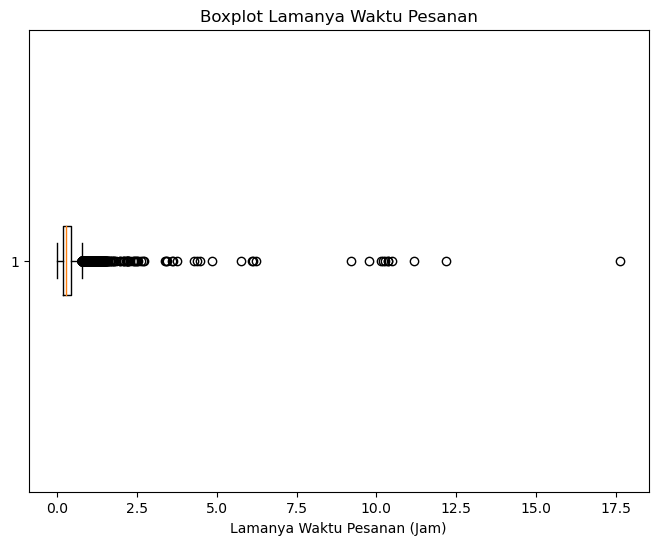

In [102]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600, vert=False)  # Mengonversi ke jam
plt.xlabel('Lamanya Waktu Pesanan (Jam)')
plt.title('Boxplot Lamanya Waktu Pesanan')
plt.show()

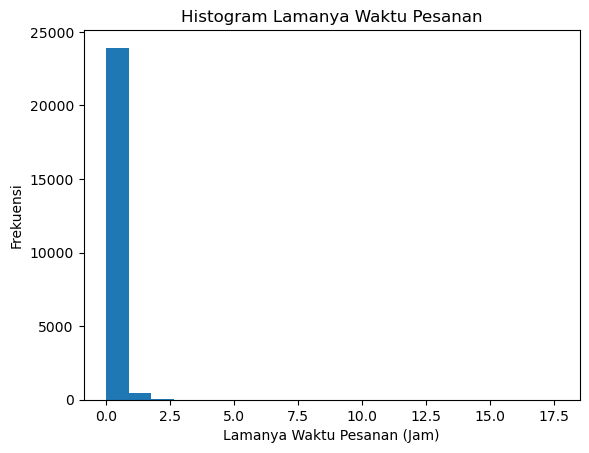

In [103]:
# Membuat histogram
plt.hist(df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600, bins=20)  # Mengonversi ke jam
plt.xlabel('Lamanya Waktu Pesanan (Jam)')
plt.ylabel('Frekuensi')
plt.title('Histogram Lamanya Waktu Pesanan')
plt.show()

In [104]:
final_df = df[df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600 < 2.5]

In [105]:
final_df

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
0,3,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 11:50:00,2023-05-01 12:15:00,19200.0,150.0,Tunai,9.55,...,0,1,0,13,386,123,17425,2325,1331.814570,0 days 00:25:00
1,4,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-01 11:35:00,2023-05-01 11:48:00,7200.0,150.0,Tunai,0.37,...,0,1,0,29,184,133,22585,2569,1454.529801,0 days 00:13:00
2,5,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:51:00,2023-05-01 11:16:00,15600.0,150.0,Tunai,7.62,...,0,8,0,28,143,224,9676,1516,1422.701987,0 days 00:25:00
3,6,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:14:00,2023-05-01 10:39:00,16000.0,150.0,Dompet,7.80,...,0,9,0,95,262,218,23375,4699,1993.006623,0 days 00:25:00
4,7,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 09:05:00,2023-05-01 09:17:00,8000.0,150.0,Dompet,3.90,...,0,1,0,13,386,123,17425,2325,1331.814570,0 days 00:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24441,27956,NaN,godcu.scm2828@gmail.com,Ride,2023-05-08 23:54:00,2023-05-09 00:04:00,8000.0,150.0,Tunai,1.45,...,0,6,1,32,699,271,8344,438,1170.907285,0 days 00:10:00
24442,27974,NaN,godcu.scm2828@gmail.com,Ride,2023-05-07 23:54:00,2023-05-08 00:06:00,8000.0,150.0,Tunai,1.65,...,0,6,1,32,699,271,8344,438,1170.907285,0 days 00:12:00
24443,28014,NaN,godcu.scm2828@gmail.com,Food,2023-05-04 23:58:00,2023-05-05 00:12:00,13200.0,150.0,Tunai,2.43,...,2,17,0,106,1064,1118,34749,9190,1700.907285,0 days 00:14:00
24444,28028,NaN,godcu.scm2828@gmail.com,Ride,2023-05-02 23:54:00,2023-05-03 00:42:00,15000.0,150.0,Dompet,8.00,...,0,20,1,50,980,579,13277,630,1241.993377,0 days 00:48:00


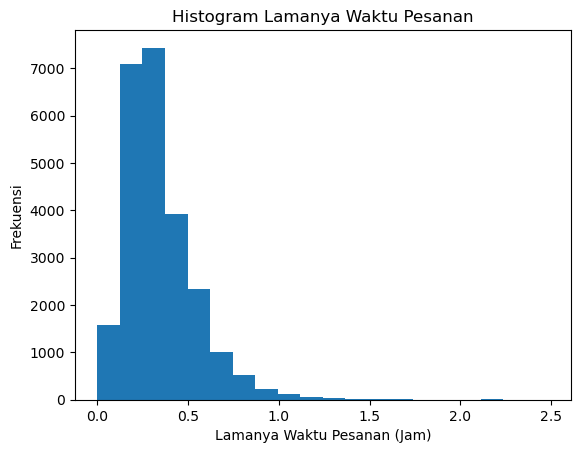

In [106]:
# Membuat histogram
plt.hist(final_df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600, bins=20)  # Mengonversi ke jam
plt.xlabel('Lamanya Waktu Pesanan (Jam)')
plt.ylabel('Frekuensi')
plt.title('Histogram Lamanya Waktu Pesanan')
plt.show()

In [107]:
final_df['trip_lamanya_waktu_pesanan'] = final_df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600

/tmp/ipykernel_45672/349708024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['trip_lamanya_waktu_pesanan'] = final_df['trip_lamanya_waktu_pesanan'].dt.total_seconds() / 3600


In [109]:
final_df.head()

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
0,3,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 11:50:00,2023-05-01 12:15:00,19200.0,150.0,Tunai,9.55,...,0,1,0,13,386,123,17425,2325,1331.814570,0.416667
1,4,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-01 11:35:00,2023-05-01 11:48:00,7200.0,150.0,Tunai,0.37,...,0,1,0,29,184,133,22585,2569,1454.529801,0.216667
2,5,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:51:00,2023-05-01 11:16:00,15600.0,150.0,Tunai,7.62,...,0,8,0,28,143,224,9676,1516,1422.701987,0.416667
3,6,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:14:00,2023-05-01 10:39:00,16000.0,150.0,Dompet,7.80,...,0,9,0,95,262,218,23375,4699,1993.006623,0.416667
4,7,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 09:05:00,2023-05-01 09:17:00,8000.0,150.0,Dompet,3.90,...,0,1,0,13,386,123,17425,2325,1331.814570,0.200000


In [108]:
final_df.to_excel("../data/for_mnl_filter_time.xlsx")

#### Cleaning all data (encoding)

In [112]:
final_df = pd.read_excel("../data/for_mnl_filter_time.xlsx")
final_df.head()

,trip_id,driver_id,driver_email,trip_jenis_pesanan,trip_datetime_tugas,trip_datetime_selesai,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
0,3,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 11:50:00,2023-05-01 12:15:00,19200.0,150.0,Tunai,9.55,...,0,1,0,13,386,123,17425,2325,1331.814570,0.416667
1,4,8.212093e+10,brigezwawan72@gmail.com,Food,2023-05-01 11:35:00,2023-05-01 11:48:00,7200.0,150.0,Tunai,0.37,...,0,1,0,29,184,133,22585,2569,1454.529801,0.216667
2,5,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:51:00,2023-05-01 11:16:00,15600.0,150.0,Tunai,7.62,...,0,8,0,28,143,224,9676,1516,1422.701987,0.416667
3,6,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 10:14:00,2023-05-01 10:39:00,16000.0,150.0,Dompet,7.80,...,0,9,0,95,262,218,23375,4699,1993.006623,0.416667
4,7,8.212093e+10,brigezwawan72@gmail.com,Ride,2023-05-01 09:05:00,2023-05-01 09:17:00,8000.0,150.0,Dompet,3.90,...,0,1,0,13,386,123,17425,2325,1331.814570,0.200000


In [113]:
# Check for non-numeric columns
non_numeric_cols = final_df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

# Check for columns with mixed data types
mixed_dtype_cols = []
for col in final_df.columns:
    if final_df[col].apply(type).nunique() > 1:
        mixed_dtype_cols.append(col)
mixed_dtype_cols

Index(['driver_email', 'trip_jenis_pesanan', 'trip_datetime_tugas',
       'trip_datetime_selesai', 'trip_jenis_pembayaran', 'trip_pickup',
       'sosdem_jk', 'sosdem_status_nikah', 'sosdem_alamat_kelurahan',
       'sosdem_alamat_desa', 'sosdem_alamat_kabkota',
       'sosdem_pendidikan_terakhir', 'sosdem_posisi_rt',
       'sosdem_penghasilan_pribadi', 'sosdem_penghasilan_keluarga',
       'sosdem_pekerjaan_selain', 'beh_platform', 'beh_rata_jam_online',
       'beh_status_kendaraan', 'beh_lama_driver', 'beh_ojek_konvensional'],
      dtype='object')


['driver_email', 'trip_jenis_pesanan', 'trip_jenis_pembayaran']

drop beberapa kolom yang tidak diperlukan

In [114]:
df_pca = final_df.drop(['driver_id', 'trip_id', 'driver_email', 'trip_datetime_tugas', 'trip_datetime_selesai', 'trip_kode', 'trip_pickup', 'sosdem_alamat_kelurahan', 'sosdem_alamat_desa', 'sosdem_alamat_kabkota'], axis=1)

In [115]:
df_pca.head()

,trip_jenis_pesanan,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_status_nikah,sosdem_pendidikan_terakhir,...,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan
0,Ride,19200.0,150.0,Tunai,9.55,1,47,Laki-laki,Menikah,SMA/SMK,...,0,1,0,13,386,123,17425,2325,1331.814570,0.416667
1,Food,7200.0,150.0,Tunai,0.37,1,47,Laki-laki,Menikah,SMA/SMK,...,0,1,0,29,184,133,22585,2569,1454.529801,0.216667
2,Ride,15600.0,150.0,Tunai,7.62,1,47,Laki-laki,Menikah,SMA/SMK,...,0,8,0,28,143,224,9676,1516,1422.701987,0.416667
3,Ride,16000.0,150.0,Dompet,7.80,1,47,Laki-laki,Menikah,SMA/SMK,...,0,9,0,95,262,218,23375,4699,1993.006623,0.416667
4,Ride,8000.0,150.0,Dompet,3.90,1,47,Laki-laki,Menikah,SMA/SMK,...,0,1,0,13,386,123,17425,2325,1331.814570,0.200000


#### Data Sosio-demografi

In [116]:
keyword = 'sosdem'  # Kata kunci yang ingin Anda cari dalam nama kolom
df_pca.filter(like=keyword, axis=1)

,sosdem_usia,sosdem_jk,sosdem_status_nikah,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,sosdem_posisi_rt,sosdem_penghasilan_pribadi,sosdem_penghasilan_keluarga,sosdem_pekerjaan_selain
0,47,Laki-laki,Menikah,SMA/SMK,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan
1,47,Laki-laki,Menikah,SMA/SMK,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan
2,47,Laki-laki,Menikah,SMA/SMK,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan
3,47,Laki-laki,Menikah,SMA/SMK,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan
4,47,Laki-laki,Menikah,SMA/SMK,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan
...,...,...,...,...,...,...,...,...,...,...,...
24411,39,Laki-laki,Belum Menikah,SMA/SMK,1,1.0,3,Anak,Rp1.000.000-Rp.1.999.999,Rp1.000.000-Rp.1.999.999,Tidak ada
24412,39,Laki-laki,Belum Menikah,SMA/SMK,1,1.0,3,Anak,Rp1.000.000-Rp.1.999.999,Rp1.000.000-Rp.1.999.999,Tidak ada
24413,39,Laki-laki,Belum Menikah,SMA/SMK,1,1.0,3,Anak,Rp1.000.000-Rp.1.999.999,Rp1.000.000-Rp.1.999.999,Tidak ada
24414,39,Laki-laki,Belum Menikah,SMA/SMK,1,1.0,3,Anak,Rp1.000.000-Rp.1.999.999,Rp1.000.000-Rp.1.999.999,Tidak ada


##### 1. Encoding data **Jenis Kelamin**
Laki-laki = 0, Perempuan = 1

In [117]:
# encode categorical   
df_pca['sosdem_jk'] = df_pca['sosdem_jk'].replace(['Laki-laki', 'Perempuan'], [0, 1]) # Laki-laki = 0, Perempuan = 1

In [118]:
df_pca['sosdem_jk'].value_counts()

sosdem_jk
0    24386
1       30
Name: count, dtype: int64

In [119]:
# check the null values
df_pca['sosdem_jk'].isnull().sum()

0

##### 2. Encoding data Status Nikah
Data status nikah karena tidak memiliki sifat orinal, maka perlu dilakukan one hot encoding

In [120]:
# see the unique values of status_nikah
df_pca['sosdem_status_nikah'].value_counts()

sosdem_status_nikah
Menikah          20228
Belum Menikah     3014
Cerai             1174
Name: count, dtype: int64

In [121]:
# hot encoding for categorical data for status_nikah
df_pca = pd.get_dummies(df_pca, columns=['sosdem_status_nikah'])
df_pca.head()

,trip_jenis_pesanan,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,...,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Belum Menikah,sosdem_status_nikah_Cerai,sosdem_status_nikah_Menikah
0,Ride,19200.0,150.0,Tunai,9.55,1,47,0,SMA/SMK,1,...,13,386,123,17425,2325,1331.814570,0.416667,False,False,True
1,Food,7200.0,150.0,Tunai,0.37,1,47,0,SMA/SMK,1,...,29,184,133,22585,2569,1454.529801,0.216667,False,False,True
2,Ride,15600.0,150.0,Tunai,7.62,1,47,0,SMA/SMK,1,...,28,143,224,9676,1516,1422.701987,0.416667,False,False,True
3,Ride,16000.0,150.0,Dompet,7.80,1,47,0,SMA/SMK,1,...,95,262,218,23375,4699,1993.006623,0.416667,False,False,True
4,Ride,8000.0,150.0,Dompet,3.90,1,47,0,SMA/SMK,1,...,13,386,123,17425,2325,1331.814570,0.200000,False,False,True


In [122]:
df_pca[['sosdem_status_nikah_Belum Menikah','sosdem_status_nikah_Cerai', 'sosdem_status_nikah_Menikah']].corr()

,sosdem_status_nikah_Belum Menikah,sosdem_status_nikah_Cerai,sosdem_status_nikah_Menikah
sosdem_status_nikah_Belum Menikah,1.000000,-0.084342,-0.824741
sosdem_status_nikah_Cerai,-0.084342,1.000000,-0.493936
sosdem_status_nikah_Menikah,-0.824741,-0.493936,1.000000


##### 3. Encoding data Pendidikan Terakhir
Data pendidikan terakhir memiliki sifat ordinal, maka perlu dilakukan ordinal encoding
* Pascasarjana atau lebih tinggi = 6
    Jika terdapat value 'S2', masukkan value 6
* Sarjana = 5
* Diploma = 4
* SMA/SMK = 3
* SMP = 2
* SD = 1

In [123]:
# see the unique values of pendidikan_terakhir
df_pca['sosdem_pendidikan_terakhir'].value_counts()

sosdem_pendidikan_terakhir
SMA/SMK    18916
SMP         3035
Diploma     1015
Sarjana      741
SD           643
S2            66
Name: count, dtype: int64

In [124]:
# Mapping dictionary for educational level
education_mapping = {
    'Pascasarjana atau lebih tinggi': 6,
    'S2': 6,
    'Sarjana': 5,
    'Diploma': 4,
    'SMA/SMK': 3,
    'SMP': 2,
    'SD': 1
}

# Apply mapping to create encoded column
df_pca['sosdem_pendidikan_terakhir'] = df_pca['sosdem_pendidikan_terakhir'].map(education_mapping)

In [125]:
keyword = 'sosdem'  # Kata kunci yang ingin Anda cari dalam nama kolom
df_pca.filter(like=keyword, axis=1).head()

,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,sosdem_posisi_rt,sosdem_penghasilan_pribadi,sosdem_penghasilan_keluarga,sosdem_pekerjaan_selain,sosdem_status_nikah_Belum Menikah,sosdem_status_nikah_Cerai,sosdem_status_nikah_Menikah
0,47,0,3,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan,False,False,True
1,47,0,3,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan,False,False,True
2,47,0,3,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan,False,False,True
3,47,0,3,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan,False,False,True
4,47,0,3,1,0.0,5,Kepala rumah tangga,Rp4.000.000-Rp4.999.999,Rp6.000.000-Rp6.999.999,Wirausahawan,False,False,True


In [126]:
# see the unique values of pendidikan_terakhir
df_pca['sosdem_pendidikan_terakhir'].value_counts()

sosdem_pendidikan_terakhir
3    18916
2     3035
4     1015
5      741
1      643
6       66
Name: count, dtype: int64

In [127]:
# check the null values of pendidikan_terakhir
df_pca['sosdem_pendidikan_terakhir'].isnull().sum()

0

##### 4. Encoding data Posisi Rumah Tangga
Data posisi rumah tangga memiliki sifat ordinal, maka perlu dilakukan ordinal encoding
* Kepala Rumah Tangga = 3
* Istri = 2
* Anak = 1

In [128]:
# see the unique values of posisi_rt
df_pca['sosdem_posisi_rt'].value_counts()

sosdem_posisi_rt
Kepala rumah tangga    21899
Anak                    2517
Name: count, dtype: int64

In [129]:
# mapping dictionary for posisi_rt
posisi_rt_mapping = {
    'Kepala rumah tangga': 1,
    'Istri': 0,
    'Anak': 0
}

# apply mapping to create encoded column
df_pca['sosdem_posisi_rt'] = df_pca['sosdem_posisi_rt'].map(posisi_rt_mapping)

In [130]:
# see the unique values of posisi_rt
df_pca['sosdem_posisi_rt'].value_counts()

sosdem_posisi_rt
1    21899
0     2517
Name: count, dtype: int64

##### 5. Encoding data penghasilan pribadi 
Encoding dilakukan dengan memilih median/mean dari setiap kategori penghasilan pribadi

In [131]:
# see the unique values of penghasilan_pribadi
df_pca['sosdem_penghasilan_pribadi'].value_counts()

sosdem_penghasilan_pribadi
Rp3.000.000-Rp3.999.999     8044
Rp2.000.000-Rp2.999.999     4577
Rp4.000.000-Rp4.999.999     4317
Rp1.000.000-Rp.1.999.999    2598
Rp5.000.000-Rp5.999.999     2061
Rp7.000.000-Rp7.999.999     1075
Rp6.000.000-Rp6.999.999      999
Di bawah Rp1.000.000         594
Rp9.000.000-Rp9.999.999       93
Rp8.000.000-R8.999.999        58
Name: count, dtype: int64

In [132]:
# see the null values of penghasilan_pribadi
df_pca['sosdem_penghasilan_pribadi'].isnull().sum()

0

In [133]:
# mapping dictionary for penghasilan_pribadi
penghasilan_pribadi_mapping = {
    'Di bawah Rp1.000.000': 1000000,
    'Rp1.000.000-Rp.1.999.999': 1499999.5,
    'Rp2.000.000-Rp2.999.999': 2499999.5,
    'Rp3.000.000-Rp3.999.999': 3499999.5,
    'Rp4.000.000-Rp4.999.999': 4499999.5,
    'Rp5.000.000-Rp5.999.999': 5499999.5,
    'Rp6.000.000-Rp6.999.999': 6499999.5,
    'Rp7.000.000-Rp7.999.999': 7499999.5,
    'Rp8.000.000-Rp8.999.999': 8499999.5,
    'Rp8.000.000-R8.999.999': 8499999.5,
    'Rp9.000.000-Rp.9.999.999': 9499999.5,
    'Rp9.000.000-Rp9.999.999': 9499999.5,
    'Rp10.000.000-Rp10.999.999': 10499999.5,
    'Rp11.000.000-Rp11.999.999': 11499999.5,
    'Rp12.000.000-Rp12.999.999': 12499999.5,
    'Rp13.000.000-Rp13.999.999': 13499999.5,
    'Rp14.000.000-Rp14.999.999': 15499999.5,
    'Lebih dari Rp15.000.000': 15000000
}

# apply mapping to create encoded column
df_pca['sosdem_penghasilan_pribadi'] = df_pca['sosdem_penghasilan_pribadi'].map(penghasilan_pribadi_mapping)

##### 6. Encoding data penghasilan rumah tangga
Dengan memilih median/mean dari setiap kategori penghasilan rumah tangga

In [134]:
# see the unique values of penghasilan_keluarga
df_pca['sosdem_penghasilan_keluarga'].value_counts()

sosdem_penghasilan_keluarga
Rp3.000.000-Rp3.999.999      7100
Rp4.000.000-Rp4.999.999      4158
Rp5.000.000-Rp5.999.999      3619
Rp2.000.000-Rp2.999.999      2383
Rp1.000.000-Rp.1.999.999     2020
Rp7.000.000-Rp7.999.999      1427
Rp6.000.000-Rp6.999.999      1191
Rp8.000.000-R8.999.999        900
Rp10.000.000-Rp10.999.999     573
Rp9.000.000-Rp9.999.999       567
Di bawah Rp1.000.000          478
Name: count, dtype: int64

In [135]:
# apply the same mapping dictionary for penghasilan_keluarga
df_pca['sosdem_penghasilan_keluarga'] = df_pca['sosdem_penghasilan_keluarga'].map(penghasilan_pribadi_mapping)

##### 7. Encoding data pekerjaan lain selain driver

Data perkerjaan lain selain driver memiliki sifat bukan ordinal, maka perlu dilakukan one hot encoding

In [136]:
# see the unique values of pekerjaan_selain
df_pca['sosdem_pekerjaan_selain'].value_counts()

sosdem_pekerjaan_selain
Tidak ada                           21758
Wirausahawan                         1723
Karyawan Swasta (Part-time)           675
Pegawai Negeri Sipil (Full-time)      131
Karyawan Swasta (Full-time)           129
Name: count, dtype: int64

In [137]:
# mapping dictionary for pekerjaan_selain
pekerjaan_mapping = {
    'Karyawan Swasta (Full-time)': 3,
    'Pegawai Negeri Sipil (Full-time)': 3,
    'Wirausahawan': 3,
    'Mahasiswa': 2,
    'Karyawan Swasta (Part-time)': 2,
    'Pegawai Negeri Sipil (Part-time)': 2,
    'Tidak ada': 1
}
# apply mapping to create encoded column
df_pca['sosdem_pekerjaan_selain'] = df_pca['sosdem_pekerjaan_selain'].map(pekerjaan_mapping)

In [138]:
# see the unique values of pekerjaan_selain
df_pca['sosdem_pekerjaan_selain'].value_counts()

sosdem_pekerjaan_selain
1    21758
3     1983
2      675
Name: count, dtype: int64

Pekerjaan selain driver dikelompokkan berdasarkan tingkat keterikatannya dan porsi waktunya. Apabila pekerjaan semakin terikat atau full time, maka nilai semakin tinggi. Apabila pekerjaan semakin tidak terikat atau part time, maka nilai semakin rendah.

#### Data Operasional

In [139]:
keyword = 'beh'  # Kata kunci yang ingin Anda cari dalam nama kolom
df_pca.filter(like=keyword, axis=1).head()

,beh_peta_potensi,beh_platform,beh_rata_jam_online,beh_status_kendaraan,beh_lama_driver,beh_ojek_konvensional
0,1,"Gojek, Grab",8-10 jam,Pribadi,5-7 tahun,Tidak
1,1,"Gojek, Grab",8-10 jam,Pribadi,5-7 tahun,Tidak
2,1,"Gojek, Grab",8-10 jam,Pribadi,5-7 tahun,Tidak
3,1,"Gojek, Grab",8-10 jam,Pribadi,5-7 tahun,Tidak
4,1,"Gojek, Grab",8-10 jam,Pribadi,5-7 tahun,Tidak


##### 1. Encoding data rata-rata jam online
Dengan memilih median/mean dari setiap kategori rata-rata jam online

In [140]:
# see the unique values of rata_jam_online
df_pca['beh_rata_jam_online'].value_counts()

beh_rata_jam_online
Di atas 10 jam    15989
8-10 jam           6796
6-8 jam            1450
4-6 jam             157
2-4 jam              24
Name: count, dtype: int64

In [141]:
# mapping dictionary for rata_jam_online
rata_jam_online_mapping = {
    'Di bawah 2 jam': 1,
    '2-4 jam': 3,
    '4-6 jam': 5,
    '6-8 jam': 7,
    '8-10 jam': 9,
    'Di atas 10 jam': 11
}

# apply mapping to create encoded column
df_pca['beh_rata_jam_online'] = df_pca['beh_rata_jam_online'].map(rata_jam_online_mapping)

In [142]:
# see the unique values of rata_jam_online
df_pca['beh_rata_jam_online'].value_counts()

beh_rata_jam_online
11    15989
9      6796
7      1450
5       157
3        24
Name: count, dtype: int64

##### 2. Encoding data status kendaraan yang digunakan untuk bekerja
Data status kendaraan yang digunakan untuk bekerja memiliki sifat bukan ordinal, maka perlu dilakukan one hot encoding untuk status pribadi atau sewa dengan pribadi = 1, sedangkan status sewa = 0

In [143]:
# see the unique values of status_kendaraan
df_pca['beh_status_kendaraan'].value_counts()

beh_status_kendaraan
Pribadi         23699
Sewa              323
Masih kredit      141
cicilan            88
kredit             87
Cicilan            62
Gadai              16
Name: count, dtype: int64

In [144]:
# mapping dictionary for status_kendaraan
status_kendaraan_mapping = {
    'Pribadi': 1,
    'Cicilan': 1,
    'Gadai': 1,
    'Masih kredit': 1,
    'cicilan': 1,
    'kredit': 1,
    'Sewa': 0,
    'Pinjam': 0
}

# apply mapping to create encoded column
df_pca['beh_status_kendaraan'] = df_pca['beh_status_kendaraan'].map(status_kendaraan_mapping)

In [145]:
# see the unique values of status_kendaraan
df_pca['beh_status_kendaraan'].value_counts()

beh_status_kendaraan
1    24093
0      323
Name: count, dtype: int64

##### 3. Encoding data lama menjadi driver
Dengan memilih median/mean dari setiap kategori lama menjadi driver

In [146]:
# see the unique values of lama_driver
df_pca['beh_lama_driver'].value_counts()

beh_lama_driver
5-7 tahun           9253
3-5 tahun           8245
7-9 tahun           3691
1-3 tahun           2775
Di atas 9 tahun      340
Di bawah 1 tahun     112
Name: count, dtype: int64

In [147]:
# mapping dictionary for lama_driver
lama_driver_mapping = {
    'Di bawah 1 tahun': 1,
    '1-3 tahun': 2,
    '3-5 tahun': 4,
    '5-7 tahun': 6,
    '7-9 tahun': 8,
    'Di atas 9 tahun': 9
}

# apply mapping to create encoded column
df_pca['beh_lama_driver'] = df_pca['beh_lama_driver'].map(lama_driver_mapping)

In [148]:
# see the unique values of lama_driver
df_pca['beh_lama_driver'].value_counts()

beh_lama_driver
6    9253
4    8245
8    3691
2    2775
9     340
1     112
Name: count, dtype: int64

##### 4. Encoding data menjadi ojek konvensional sebelum menjadi driver online
Data menjadi ojek konvensional sebelum menjadi driver online memiliki sifat bukan ordinal, maka perlu dilakukan one hot encoding

In [149]:
# see the unique values of ojek_konvensional
df_pca['beh_ojek_konvensional'].value_counts()

beh_ojek_konvensional
Tidak    21795
Ya        2621
Name: count, dtype: int64

In [150]:
# mapping dictionary for ojek_konvensional
ojek_konvensional_mapping = {
    'Ya': 1,
    'Tidak': 0
}

# apply mapping to create encoded column
df_pca['beh_ojek_konvensional'] = df_pca['beh_ojek_konvensional'].map(ojek_konvensional_mapping)

In [151]:
# see the unique values of ojek_konvensional
df_pca['beh_ojek_konvensional'].value_counts()

beh_ojek_konvensional
0    21795
1     2621
Name: count, dtype: int64

##### 5. Transformasi data platform

In [152]:
df_pca['beh_platform'].value_counts()

beh_platform
Gojek                                        19457
Gojek, Grab                                   1960
Gojek, Shopee Food                             814
Gojek, Indriver                                648
Gojek, Grab, Shopee Food                       547
Gojek, Grab, Indriver, Shopee Food             266
Gojek, Maxim                                   247
Gojek, Grab, Indriver                          194
Gojek, Maxim, Indriver, Shopee Food            149
Gojek, Grab, Maxim, Indriver, Shopee Food       86
Gojek, Maxim, Indriver                          48
Name: count, dtype: int64

In [153]:
# Convert the column into a binary column
df_pca['beh_platform'] = df_pca['beh_platform'].apply(lambda x: x.count(',') > 0)
df_pca['beh_platform'].value_counts()

beh_platform
False    19457
True      4959
Name: count, dtype: int64

In [154]:
# Check for non-numeric columns
non_numeric_cols = df_pca.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

# Check for columns with mixed data types
mixed_dtype_cols = []
for col in df_pca.columns:
    if df_pca[col].apply(type).nunique() > 1:
        mixed_dtype_cols.append(col)
mixed_dtype_cols

Index(['trip_jenis_pesanan', 'trip_jenis_pembayaran', 'beh_platform',
       'sosdem_status_nikah_Belum Menikah', 'sosdem_status_nikah_Cerai',
       'sosdem_status_nikah_Menikah'],
      dtype='object')


['trip_jenis_pesanan', 'trip_jenis_pembayaran']

#### Data Trip

In [155]:
keyword = 'trip'  # Kata kunci yang ingin Anda cari dalam nama kolom
df_pca.filter(like=keyword, axis=1)

,trip_jenis_pesanan,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,trip_lamanya_waktu_pesanan
0,Ride,19200.0,150.0,Tunai,9.55,0.416667
1,Food,7200.0,150.0,Tunai,0.37,0.216667
2,Ride,15600.0,150.0,Tunai,7.62,0.416667
3,Ride,16000.0,150.0,Dompet,7.80,0.416667
4,Ride,8000.0,150.0,Dompet,3.90,0.200000
...,...,...,...,...,...,...
24411,Ride,8000.0,150.0,Tunai,1.45,0.166667
24412,Ride,8000.0,150.0,Tunai,1.65,0.200000
24413,Food,13200.0,150.0,Tunai,2.43,0.233333
24414,Ride,15000.0,150.0,Dompet,8.00,0.800000


##### 1. Encoding Jenis Pesanan

In [157]:
# see the unique values of trip_jenis_pesanan
df_pca['trip_jenis_pesanan'].value_counts()

trip_jenis_pesanan
Food            11378
Ride             9216
Kurir Barang     3821
Name: count, dtype: int64

In [158]:
# hot encoding for categorical data for status_nikah
df_pca = pd.get_dummies(df_pca, columns=['trip_jenis_pesanan'])
df_pca.head()

,trip_pendapatan_bersih,trip_poin_tambahan,trip_jenis_pembayaran,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,...,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Belum Menikah,sosdem_status_nikah_Cerai,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride
0,19200.0,150.0,Tunai,9.55,1,47,0,3,1,0.0,...,17425,2325,1331.814570,0.416667,False,False,True,False,False,True
1,7200.0,150.0,Tunai,0.37,1,47,0,3,1,0.0,...,22585,2569,1454.529801,0.216667,False,False,True,True,False,False
2,15600.0,150.0,Tunai,7.62,1,47,0,3,1,0.0,...,9676,1516,1422.701987,0.416667,False,False,True,False,False,True
3,16000.0,150.0,Dompet,7.80,1,47,0,3,1,0.0,...,23375,4699,1993.006623,0.416667,False,False,True,False,False,True
4,8000.0,150.0,Dompet,3.90,1,47,0,3,1,0.0,...,17425,2325,1331.814570,0.200000,False,False,True,False,False,True


In [160]:
df_pca[['trip_jenis_pesanan_Food','trip_jenis_pesanan_Kurir Barang', 'trip_jenis_pesanan_Ride']].corr()

,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride
trip_jenis_pesanan_Food,1.000000,-0.402379,-0.727406
trip_jenis_pesanan_Kurir Barang,-0.402379,1.000000,-0.335395
trip_jenis_pesanan_Ride,-0.727406,-0.335395,1.000000


In [161]:
# hot encoding for categorical data for status_nikah
df_pca = pd.get_dummies(df_pca, columns=['trip_jenis_pembayaran'])
df_pca.head()

,trip_pendapatan_bersih,trip_poin_tambahan,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Belum Menikah,sosdem_status_nikah_Cerai,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Dompet,trip_jenis_pembayaran_Dompet + Tunai,trip_jenis_pembayaran_Tunai
0,19200.0,150.0,9.55,1,47,0,3,1,0.0,5,...,0.416667,False,False,True,False,False,True,False,False,True
1,7200.0,150.0,0.37,1,47,0,3,1,0.0,5,...,0.216667,False,False,True,True,False,False,False,False,True
2,15600.0,150.0,7.62,1,47,0,3,1,0.0,5,...,0.416667,False,False,True,False,False,True,False,False,True
3,16000.0,150.0,7.80,1,47,0,3,1,0.0,5,...,0.416667,False,False,True,False,False,True,True,False,False
4,8000.0,150.0,3.90,1,47,0,3,1,0.0,5,...,0.200000,False,False,True,False,False,True,True,False,False


In [162]:
df_pca = df_pca.drop('trip_jenis_pembayaran_Dompet + Tunai', axis=1)

In [164]:
df_pca = df_pca.drop('trip_jenis_pembayaran_Dompet', axis=1)

In [165]:
df_pca.head()

,trip_pendapatan_bersih,trip_poin_tambahan,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Belum Menikah,sosdem_status_nikah_Cerai,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai
0,19200.0,150.0,9.55,1,47,0,3,1,0.0,5,...,2325,1331.814570,0.416667,False,False,True,False,False,True,True
1,7200.0,150.0,0.37,1,47,0,3,1,0.0,5,...,2569,1454.529801,0.216667,False,False,True,True,False,False,True
2,15600.0,150.0,7.62,1,47,0,3,1,0.0,5,...,1516,1422.701987,0.416667,False,False,True,False,False,True,True
3,16000.0,150.0,7.80,1,47,0,3,1,0.0,5,...,4699,1993.006623,0.416667,False,False,True,False,False,True,False
4,8000.0,150.0,3.90,1,47,0,3,1,0.0,5,...,2325,1331.814570,0.200000,False,False,True,False,False,True,False


In [166]:
# Check for non-numeric columns
non_numeric_cols = df_pca.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

# Check for columns with mixed data types
mixed_dtype_cols = []
for col in df_pca.columns:
    if df_pca[col].apply(type).nunique() > 1:
        mixed_dtype_cols.append(col)
mixed_dtype_cols

Index(['beh_platform', 'sosdem_status_nikah_Belum Menikah',
       'sosdem_status_nikah_Cerai', 'sosdem_status_nikah_Menikah',
       'trip_jenis_pesanan_Food', 'trip_jenis_pesanan_Kurir Barang',
       'trip_jenis_pesanan_Ride', 'trip_jenis_pembayaran_Tunai'],
      dtype='object')


[]

In [167]:
# convert non_numeric_cols columns to numeric with astype
df_pca[non_numeric_cols] = df_pca[non_numeric_cols].astype('int')

In [168]:
# Check for non-numeric columns
non_numeric_cols = df_pca.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

Index([], dtype='object')


In [174]:
df_pca.shape

(24416, 43)

### Analisis Faktor

In [189]:
def plot_correlation_matrix(data, title):
    correlation_matrix = data.corr()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_correlation_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()

def plot_covariance_matrix(data, title):
    covariance_matrix = data.cov()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_covariance_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()


Standarisasi data

In [203]:
feature_names = df_pca.columns.tolist()
scaler = StandardScaler()
df_pca_std = pd.DataFrame(scaler.fit_transform(df_pca), columns=feature_names)

df_pca_std

,trip_pendapatan_bersih,trip_poin_tambahan,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Belum Menikah,sosdem_status_nikah_Cerai,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai
0,1.720487,-0.057793,2.114714,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.010709,-0.233092,0.370120,-0.375271,-0.224749,0.455016,-0.934173,-0.430732,1.284253,1.962934
1,-0.599947,-0.057793,-1.142896,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,0.107170,0.263845,-0.624671,-0.375271,-0.224749,0.455016,1.070465,-0.430732,-0.778663,1.962934
2,1.024357,-0.057793,1.429835,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.401546,0.134958,0.370120,-0.375271,-0.224749,0.455016,-0.934173,-0.430732,1.284253,1.962934
3,1.101705,-0.057793,1.493710,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,1.136198,2.444413,0.370120,-0.375271,-0.224749,0.455016,-0.934173,-0.430732,1.284253,-0.509441
4,-0.445251,-0.057793,0.109758,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.010709,-0.233092,-0.707570,-0.375271,-0.224749,0.455016,-0.934173,-0.430732,1.284253,-0.509441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,-0.445251,-0.057793,-0.759647,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,-0.922340,-0.884688,-0.873369,2.664744,-0.224749,-2.197724,-0.934173,-0.430732,1.284253,1.962934
24412,-0.445251,-0.057793,-0.688675,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,-0.922340,-0.884688,-0.707570,2.664744,-0.224749,-2.197724,-0.934173,-0.430732,1.284253,1.962934
24413,0.560270,-0.057793,-0.411885,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,3.305852,1.261553,-0.541772,2.664744,-0.224749,-2.197724,1.070465,-0.430732,-0.778663,1.962934
24414,0.908335,-0.057793,1.564682,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,-0.829583,-0.596824,2.276802,2.664744,-0.224749,-2.197724,-0.934173,-0.430732,1.284253,-0.509441


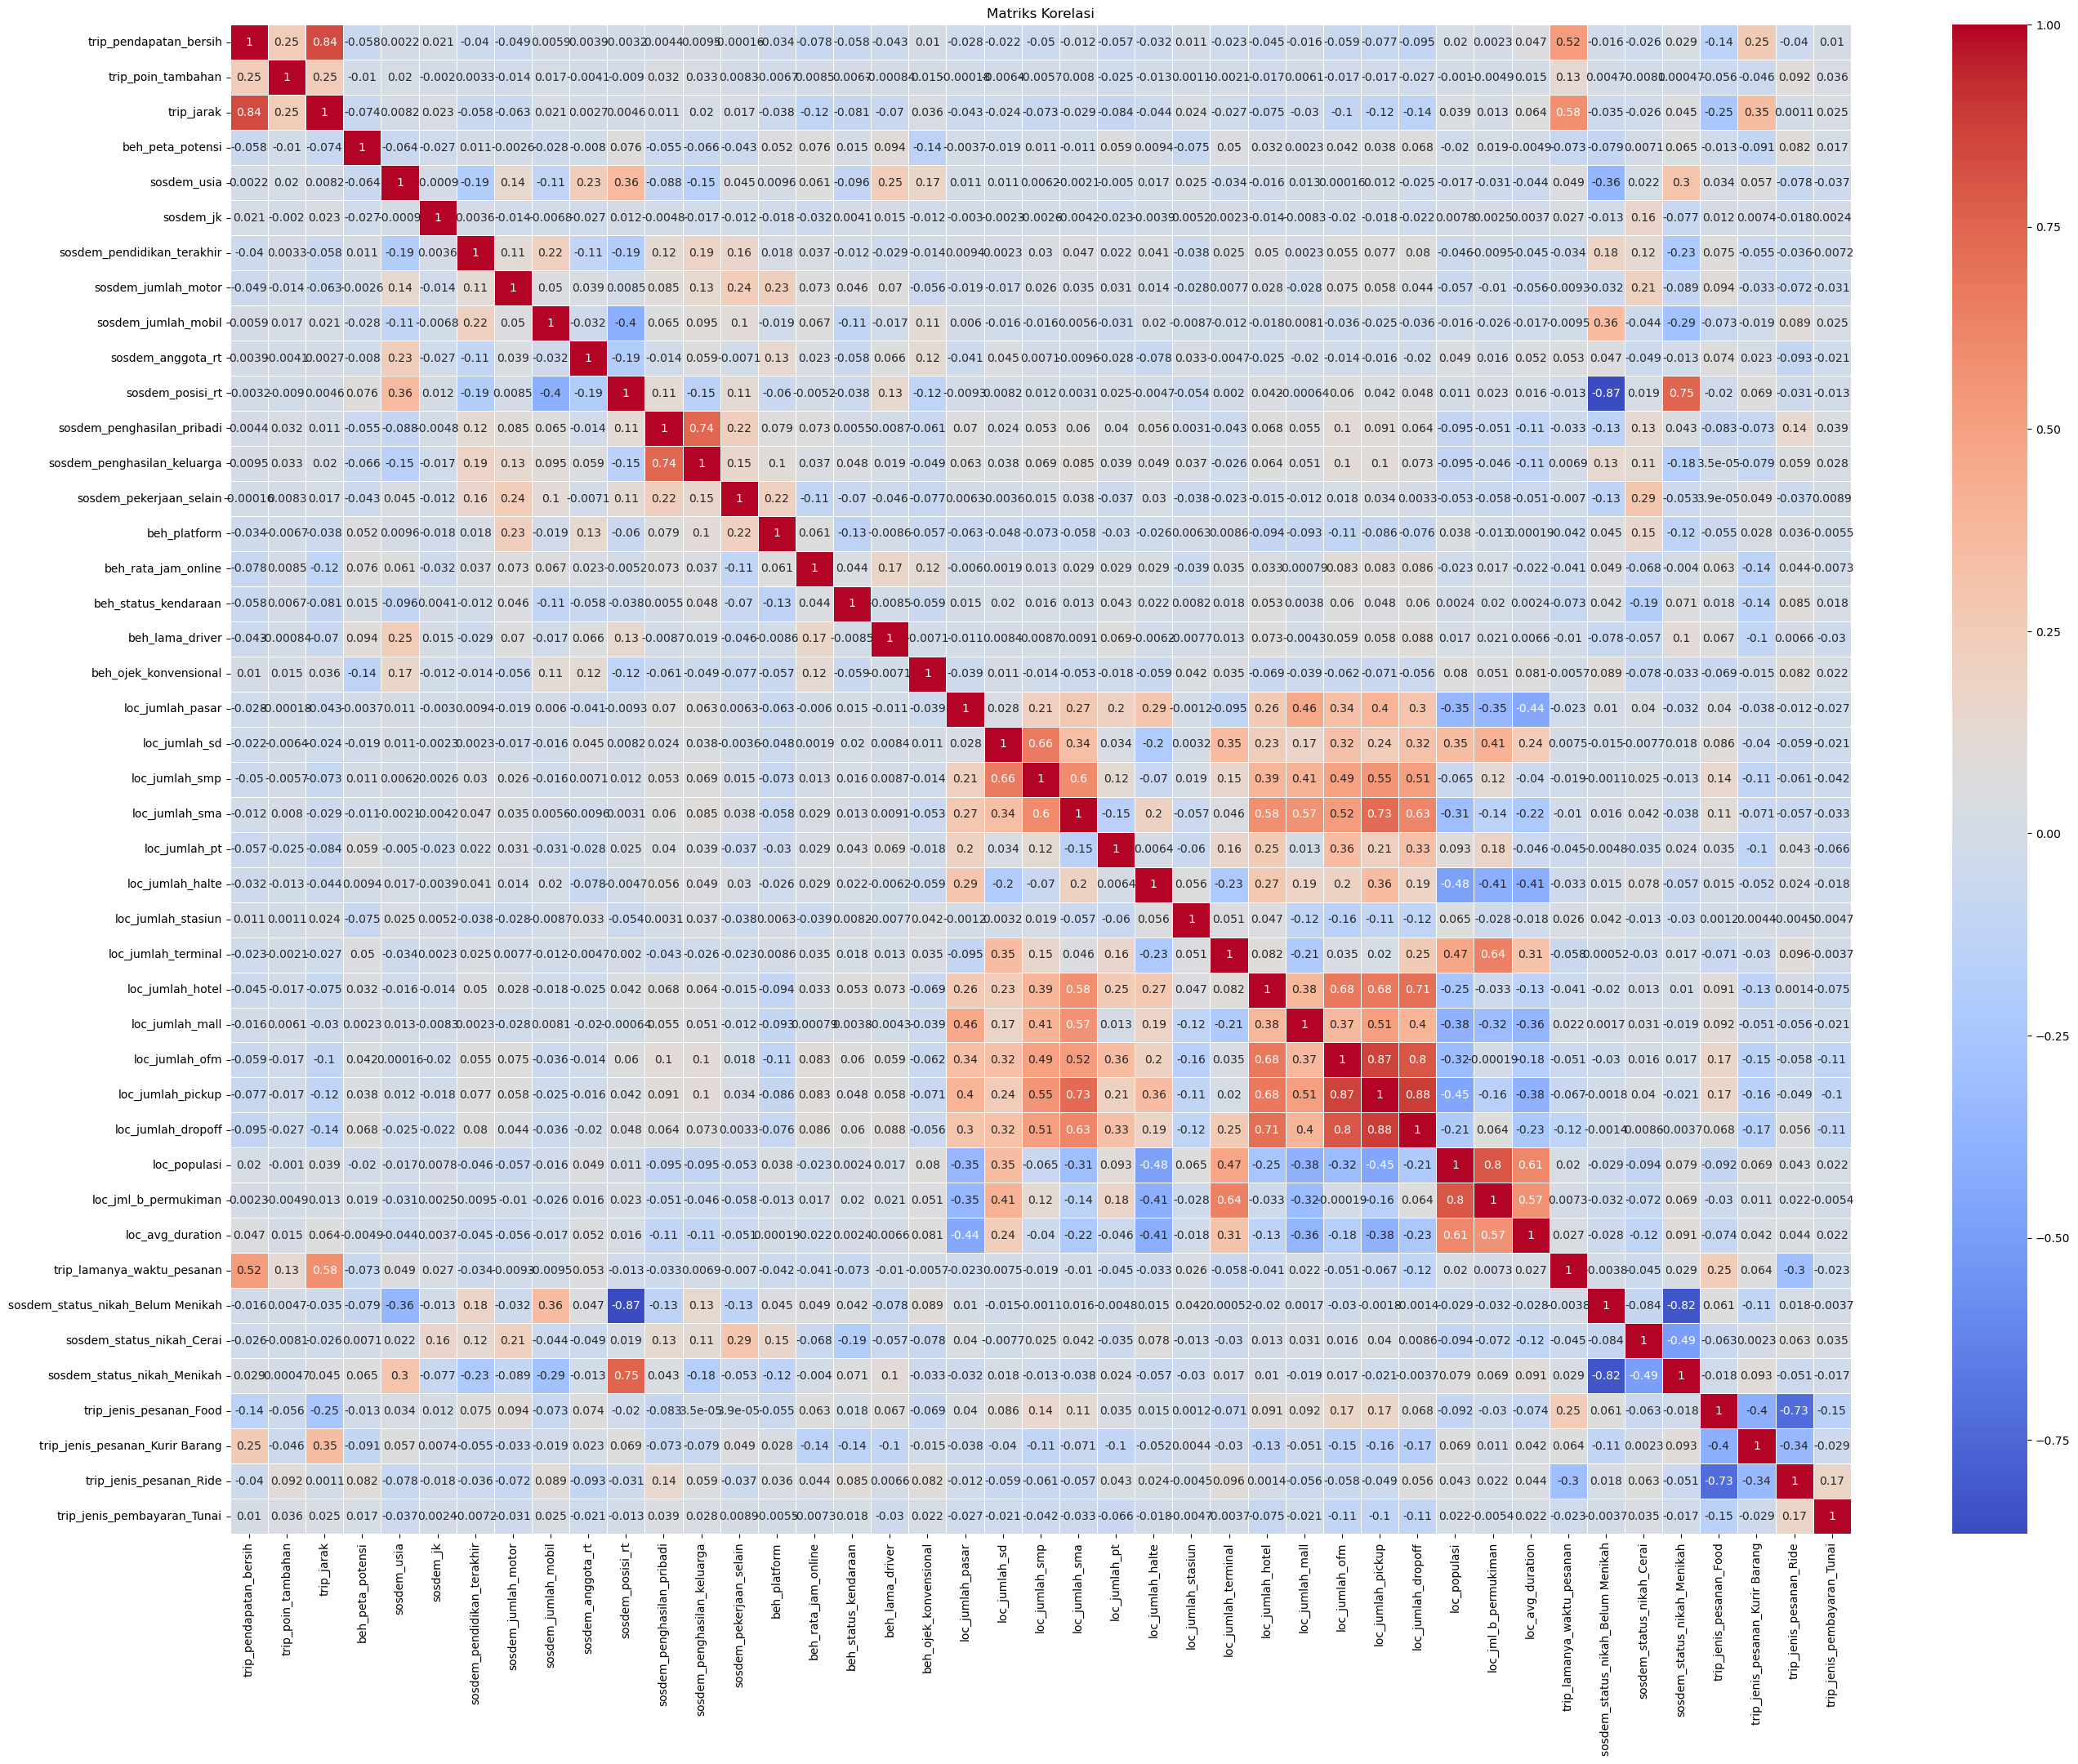

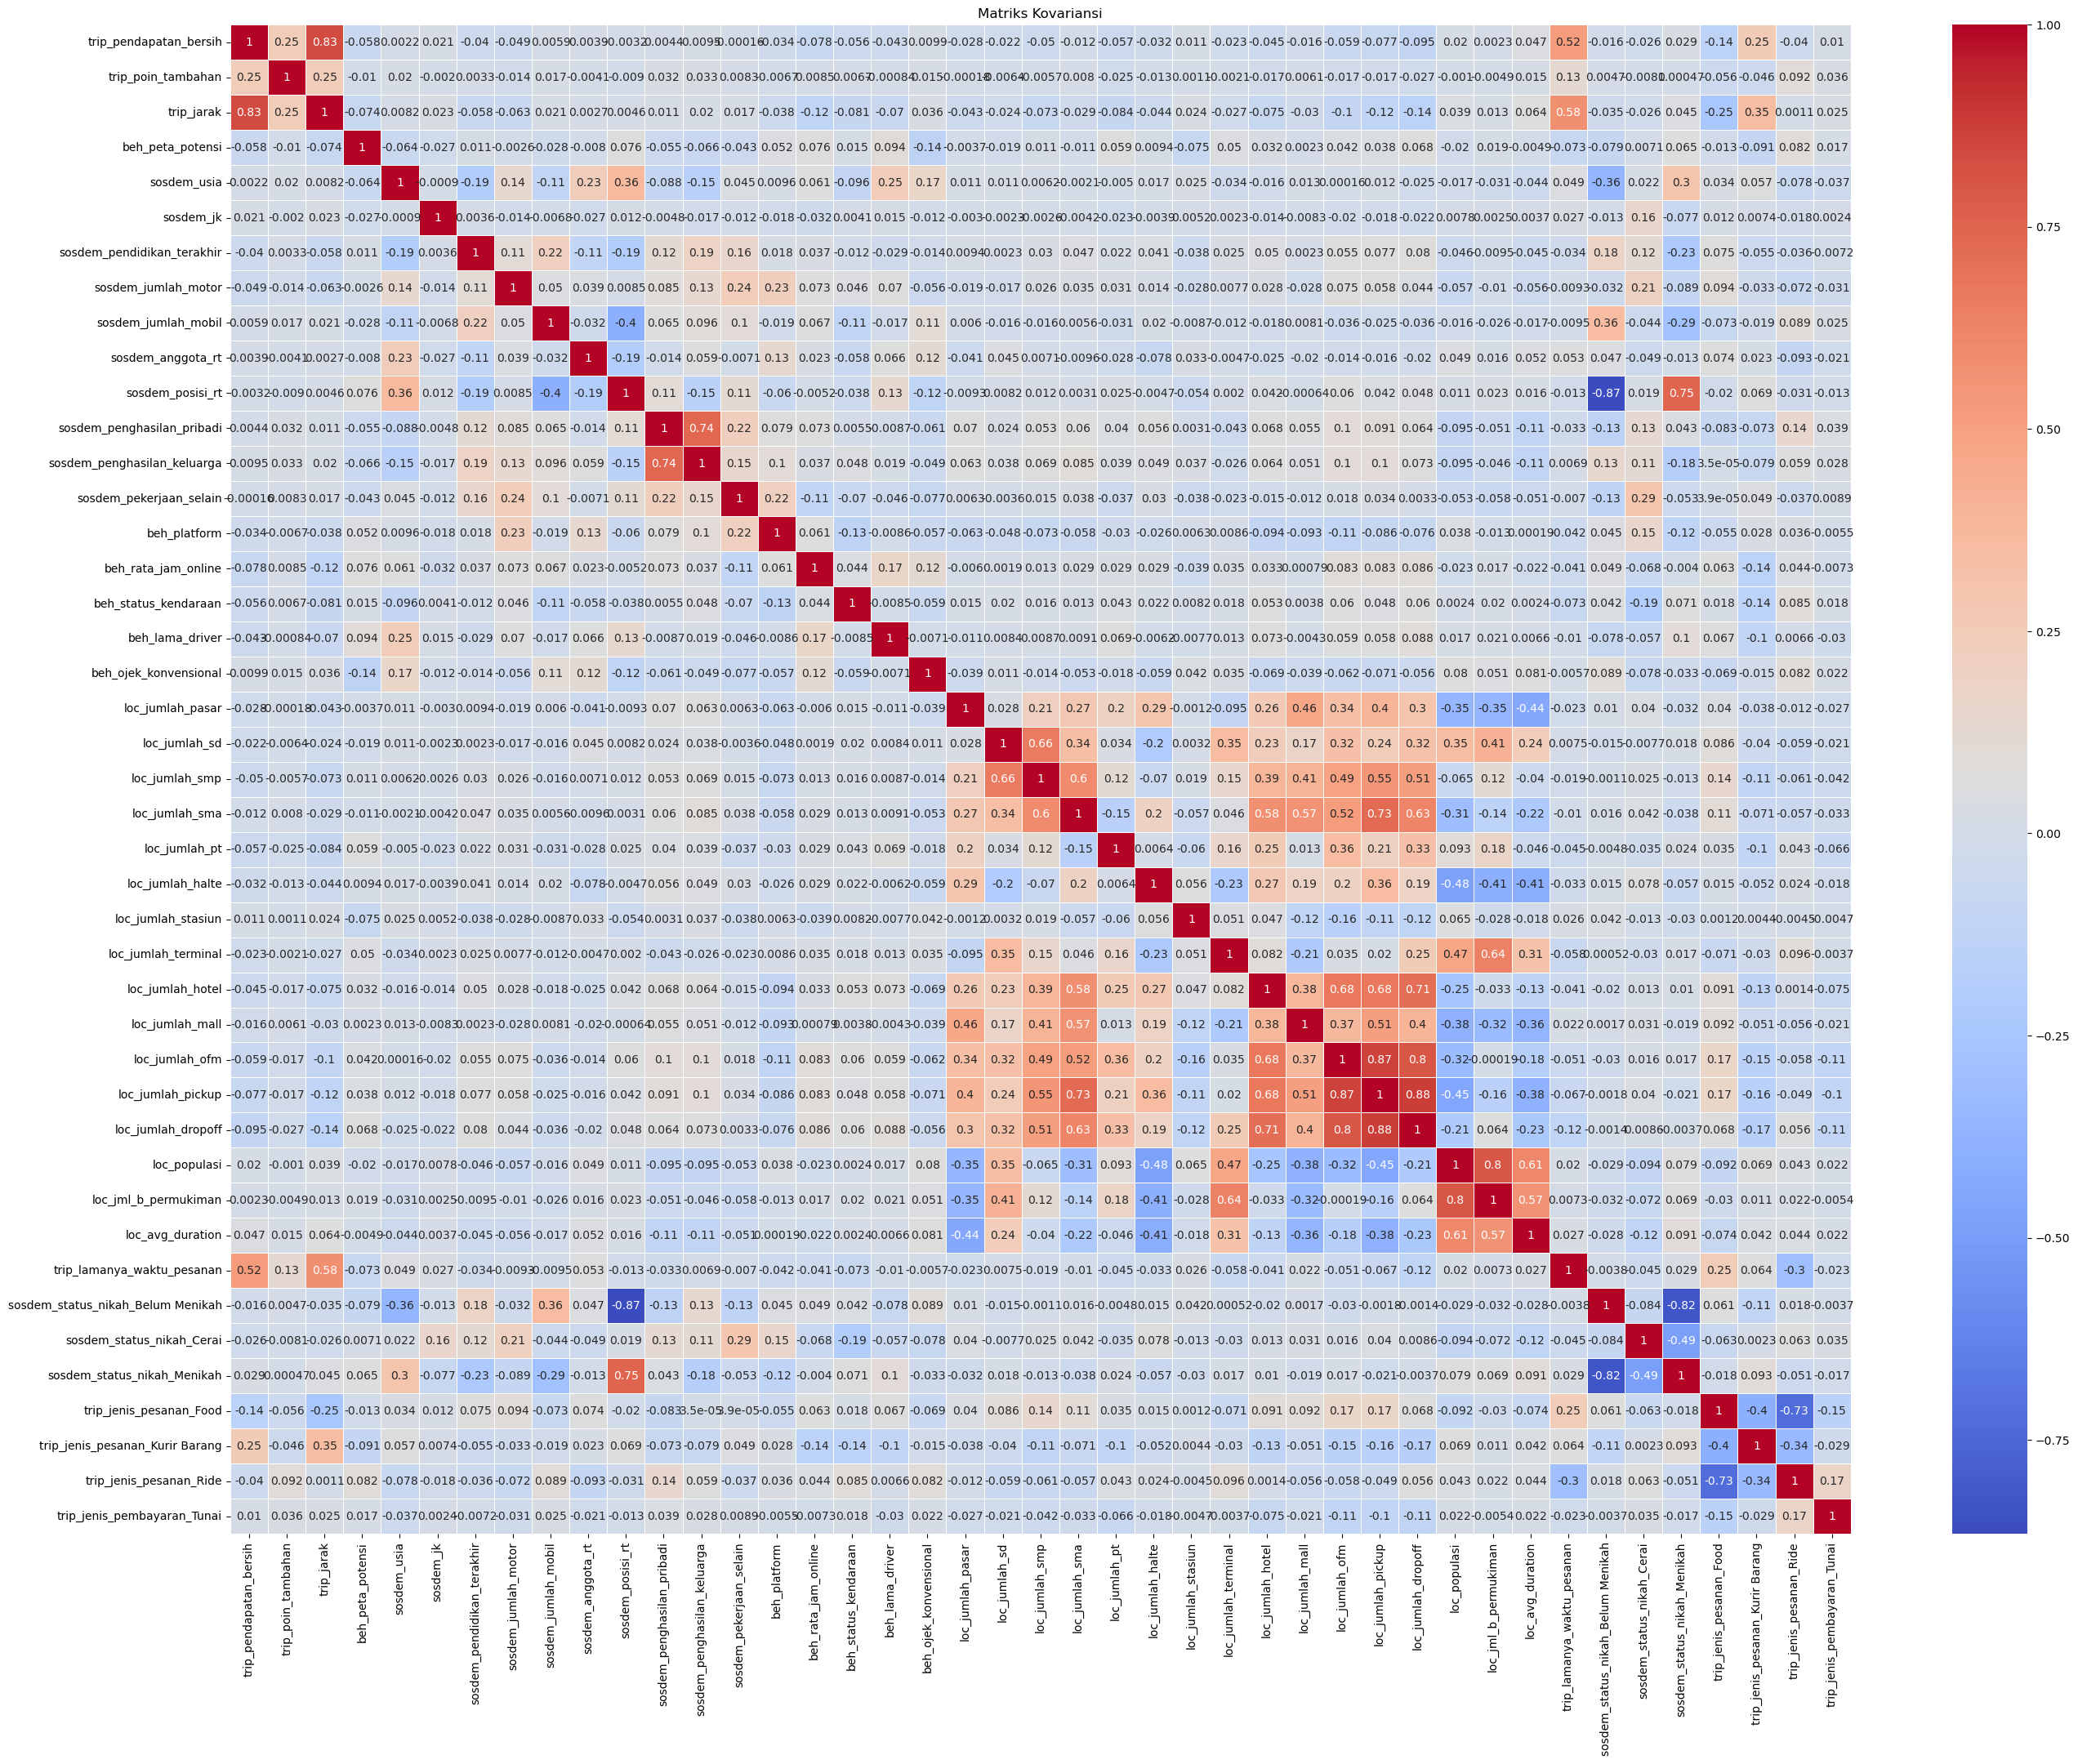

In [204]:
# Create heatmap for correlation matrix
plot_correlation_matrix(df_pca_std, "Matriks Korelasi")

# Create heatmap for covariance matrix
plot_covariance_matrix(df_pca_std, "Matriks Kovariansi")

In [205]:
threshold = 0.8
high_correlation_pairs = []
covariance_matrix = df_pca_std.cov()

for i in range(len(covariance_matrix.columns)):
    for j in range(i + 1, len(covariance_matrix.columns)):
        if abs(covariance_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((covariance_matrix.columns[i], covariance_matrix.columns[j]))

In [206]:
high_correlation_pairs

[('trip_pendapatan_bersih', 'trip_jarak'),
 ('sosdem_posisi_rt', 'sosdem_status_nikah_Belum Menikah'),
 ('loc_jumlah_ofm', 'loc_jumlah_pickup'),
 ('loc_jumlah_ofm', 'loc_jumlah_dropoff'),
 ('loc_jumlah_pickup', 'loc_jumlah_dropoff'),
 ('loc_populasi', 'loc_jml_b_permukiman'),
 ('sosdem_status_nikah_Belum Menikah', 'sosdem_status_nikah_Menikah')]

In [207]:
test1 = df_pca_std.drop(['loc_jumlah_pickup', 'loc_jumlah_dropoff', 'sosdem_status_nikah_Belum Menikah'], axis=1)

In [209]:
# Menghapus baris yang memiliki missing values dari DataFrame
test.dropna(inplace=True)

##### Tes Kecukupan (Adequacy Test)
Tes kecukupan pada analisis faktor ini bisa dilakukan dengan beberapa cara. Pada analisis ini dilakukan dengan 2 cara yaitu dengan Tes Bartlett dan Tes Kaiser-Meyer-Olkin (KMO).

* Tes Bartlett <br>
Tes ini dilakukan untuk mengetahui apakah matriks korelasi seluruh variabel dengan matriks identitas. Apabila matriks tersebut mirip dengan matriks identitas, maka semua variabel memiliki korelasi yang buruk. Tes Bartlett menghasilkan suatu p-value yang menunjukkan apakah perbedaan dengan matriks identitas signifikan atau tidak.

In [210]:
chi_square_value,p_value=calculate_bartlett_sphericity(test)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: 563591.8775702462
p-value: 0.0000000000000000


Nilai p-value yang dihasilkan lebih kecil dari 0.05. Hal tersebut menunjukkan bahwa tes ini signifikan secara statistik dan perbedaan dari chi-square yang rendah.

* Kaiser-Meyer-Olkin <br>
Tes KMO ini digunakan untuk`kelayakan atau kecukupan sampel data dengan mengestimasi proporsi variansi dari seluruh variabel. Nilai KMO ini memiliki rentang 0 hingga 1 dengan nilai dibawah 0.6 menunjukkan data kurang layak.

In [212]:
kmo_all,kmo_model=calculate_kmo(test)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.5881960709617097


/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Nilai KMO kurang dari 0.6